# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | san rafael
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | dubna
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | palmer
Processing Record 8 of Set 1 | emerald
Processing Record 9 of Set 1 | nioki
Processing Record 10 of Set 1 | catuday
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | miraflores
Processing Record 15 of Set 1 | sioux falls
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | rikitea
City not found. Skipping...
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 23 of Set 1 | port lincoln
Pro

Processing Record 39 of Set 4 | chokurdakh
Processing Record 40 of Set 4 | cachoeira do sul
Processing Record 41 of Set 4 | esperance
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 | buraydah
Processing Record 43 of Set 4 | tarauaca
Processing Record 44 of Set 4 | villa carlos paz
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | srednekolymsk
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | luderitz
Processing Record 1 of Set 5 | puri
Processing Record 2 of Set 5 | lake havasu city
Processing Record 3 of Set 5 | constitucion
City not found. Skipping...
Processing Record 4 of Set 5 | garissa
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | lipari
Processing Record 7 of Set 5 | brawley
Processing Record 8 of Set 5 | carauari
Processing Record 9 of Set 5 | north bend
Processing Record 10 of Set 5 | vardo
Processing Record 1

Processing Record 26 of Set 8 | asau
Processing Record 27 of Set 8 | olafsvik
Processing Record 28 of Set 8 | beni suef
Processing Record 29 of Set 8 | betafo
Processing Record 30 of Set 8 | ajdabiya
Processing Record 31 of Set 8 | lumut
Processing Record 32 of Set 8 | ust-koksa
City not found. Skipping...
Processing Record 33 of Set 8 | sindou
City not found. Skipping...
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | mpophomeni
Processing Record 36 of Set 8 | llata
Processing Record 37 of Set 8 | poya
Processing Record 38 of Set 8 | san matias
Processing Record 39 of Set 8 | biak
Processing Record 40 of Set 8 | alofi
Processing Record 41 of Set 8 | reconquista
Processing Record 42 of Set 8 | zhanaozen
Processing Record 43 of Set 8 | batesville
Processing Record 44 of Set 8 | strezhevoy
Processing Record 45 of Set 8 | baruun-urt
Processing Record 46 of Set 8 | pangody
City not found. Skipping...
Processing Record 47 of Set 8 | arapiraca
City not found. Skipping..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san rafael,5,ML,1623979523,44,13.3034,-4.8956,87.62,12.06
1,qaqortoq,21,GL,1623979524,71,60.7167,-46.0333,45.10,4.45
2,dubna,8,RU,1623979524,83,56.7333,37.1667,54.73,3.24
3,hermanus,69,ZA,1623979524,79,-34.4187,19.2345,54.90,3.06
4,richards bay,1,US,1623979524,36,46.8361,-95.9123,84.38,4.61


In [5]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

weather_dataframe.count()

weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san rafael,5,ML,1623979523,44,13.3034,-4.8956,87.62,12.06
1,qaqortoq,21,GL,1623979524,71,60.7167,-46.0333,45.10,4.45
2,dubna,8,RU,1623979524,83,56.7333,37.1667,54.73,3.24
3,hermanus,69,ZA,1623979524,79,-34.4187,19.2345,54.90,3.06
4,richards bay,1,US,1623979524,36,46.8361,-95.9123,84.38,4.61


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

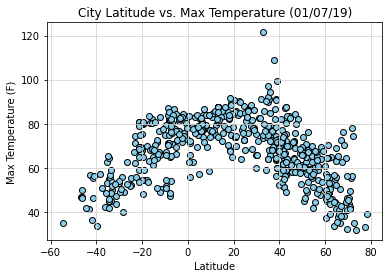

In [6]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

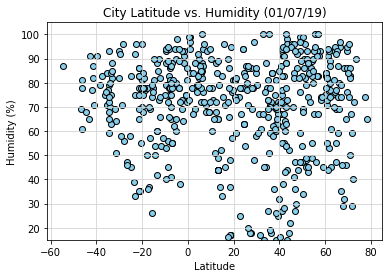

In [7]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

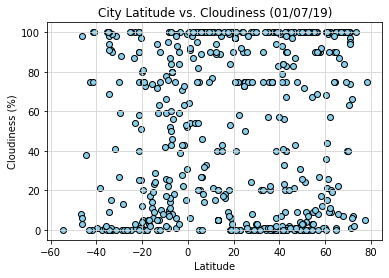

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

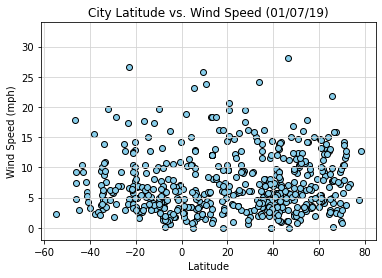

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [10]:
#takes in as arguments a DataFrame (df), the x-axis String column name (x_Col), and the y-axis String column name (y_Col)
#plots a scatter plot with the df[x_Col] on the x-axis and the df[y_Col] data on the y-axis, and the linear regression line
#prints information about the best fit line from the linear regression
#returns the axes object for the plot, so more changes can be made later if necessary
def makeLinRegression(df, x_Col, y_Col):
    #first, perform the linear regression on the data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
                                                           df[y_Col])
    #setup the linear regression line x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    #plot the scatterplot with the raw data first!
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {} ({})"
                        .format(y_Col, x_Col, remaining_cities["Date"].iloc[0].split(",")[0]))

    #add the best fit lines to the plot as a solid red line
    df_axes.plot(regr_line_x, regr_line_y, 'r')

    #output best-fit line information
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    #return the axes object for the plots, in case any changes need to be made
    return df_axes



In [11]:
# Create Northern and Southern Hemisphere DataFrames

#first, get a subset of all the cities that are on or north of the equator for the Northern Hemisphere DataFrame
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] >= 0]
northern_cities_count = len(northern_hemisphere)


#first, get a subset of all the cities that are south of the equator for the Southern Hemisphere DataFrame
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.50x+87.66
The r-squared correlation coefficient for this line is -0.68


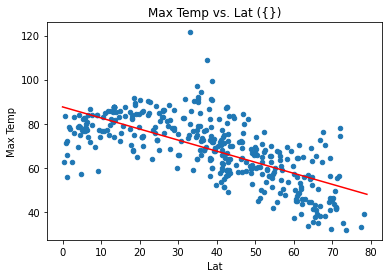

In [12]:
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemisphere["Lat"], 
                                                           northern_hemisphere["Max Temp"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Max Temp", 
                                       title="Max Temp vs. Lat ({})")
n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("../output_data/Temp_vs_Latitude_N_Hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.77x+79.53
The r-squared correlation coefficient for this line is -0.68


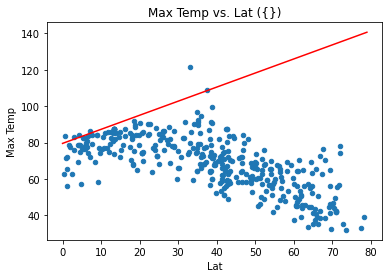

In [13]:
(s_temp_slope, s_temp_intercept, s_temp_r_val, _, _) = linregress(southern_hemisphere["Lat"], 
                                                           southern_hemisphere["Max Temp"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_temp_slope * regr_line_x + s_temp_intercept

s_temp_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Max Temp", 
                                       title="Max Temp vs. Lat ({})")
s_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_temp_slope, s_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
s_temp_axes.get_figure().savefig("../output_data/Temp_vs_Latitude_S_Hemisphere.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.03x+68.35
The r-squared correlation coefficient for this line is 0.02


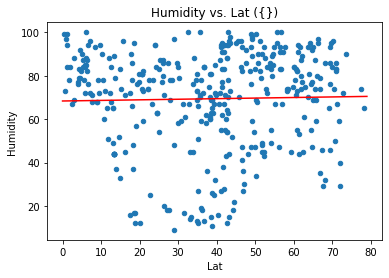

In [14]:
(n_humidity_slope, n_humidity_intercept, n_humidity_r_val, _, _) = linregress(northern_hemisphere["Lat"], 
                                                           northern_hemisphere["Humidity"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_humidity_slope * regr_line_x + n_humidity_intercept

n_humidity_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Humidity", 
                                       title="Humidity vs. Lat ({})")
n_humidity_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_humidity_slope, n_humidity_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_humidity_r_val))
n_humidity_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_N_Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.00x+73.02
The r-squared correlation coefficient for this line is -0.00


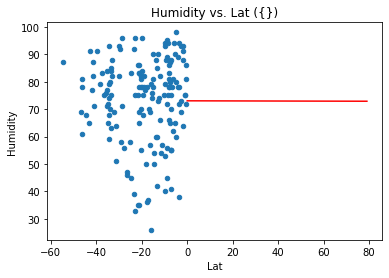

In [15]:
(s_humidity_slope, s_humidity_intercept, s_humidity_r_val, _, _) = linregress(southern_hemisphere["Lat"], 
                                                           southern_hemisphere["Humidity"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_humidity_slope * regr_line_x + s_humidity_intercept

s_humidity_axes = southern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Humidity", 
                                       title="Humidity vs. Lat ({})")
s_humidity_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_humidity_slope, s_humidity_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(s_humidity_r_val))
s_humidity_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_S_Hemisphere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.02x+54.76
The r-squared correlation coefficient for this line is 0.02


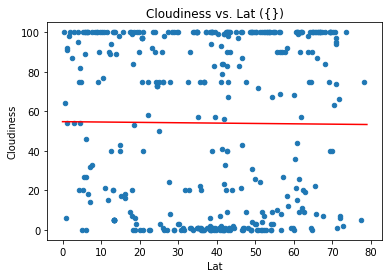

In [16]:
(n_Cloudiness_slope, n_Cloudiness_intercept, n_Cloudiness_r_val, _, _) = linregress(northern_hemisphere["Lat"], 
                                                           northern_hemisphere["Cloudiness"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_Cloudiness_slope * regr_line_x + n_Cloudiness_intercept

n_Cloudiness_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Cloudiness", 
                                       title="Cloudiness vs. Lat ({})")
n_Cloudiness_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_Cloudiness_slope, n_Cloudiness_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_humidity_r_val))
n_Cloudiness_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_N_Hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.29x+49.34
The r-squared correlation coefficient for this line is -0.00


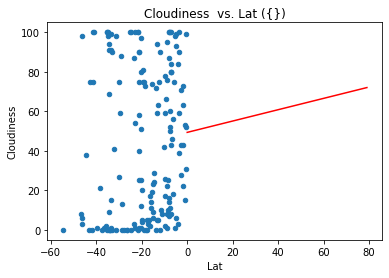

In [17]:
(s_Cloudiness_slope, s_Cloudiness_intercept, s_Cloudiness_r_val, _, _) = linregress(southern_hemisphere["Lat"], 
                                                           southern_hemisphere["Cloudiness"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_Cloudiness_slope * regr_line_x + s_Cloudiness_intercept

s_Cloudiness_axes = southern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Cloudiness", 
                                       title="Cloudiness  vs. Lat ({})")
s_Cloudiness_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_Cloudiness_slope, s_Cloudiness_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(s_humidity_r_val))
s_humidity_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_S_Hemisphere.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.00x+7.21
The r-squared correlation coefficient for this line is 0.02


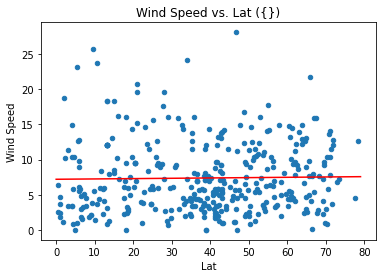

In [18]:
(n_Wind_Speed_slope, n_Wind_Speed_intercept, n_Wind_Speed_r_val, _, _) = linregress(northern_hemisphere["Lat"], 
                                                           northern_hemisphere["Wind Speed"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_Wind_Speed_slope * regr_line_x + n_Wind_Speed_intercept

n_Wind_Speed_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Wind Speed", 
                                       title="Wind Speed vs. Lat ({})")
n_Wind_Speed_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_Wind_Speed_slope, n_Wind_Speed_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_humidity_r_val))
n_Cloudiness_axes.get_figure().savefig("../output_data/Wind Speed_vs_Latitude_N_Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.05x+5.66
The r-squared correlation coefficient for this line is -0.00


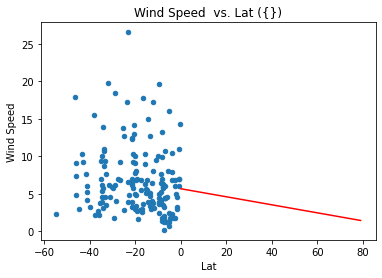

In [19]:
(s_Wind_Speed_slope, s_Wind_Speed_intercept, s_Wind_Speed_r_val, _, _) = linregress(southern_hemisphere["Lat"], 
                                                           southern_hemisphere["Wind Speed"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_Wind_Speed_slope * regr_line_x + s_Wind_Speed_intercept

s_Wind_Speed_axes = southern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Wind Speed", 
                                       title="Wind Speed  vs. Lat ({})")
s_Wind_Speed_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_Wind_Speed_slope, s_Wind_Speed_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(s_humidity_r_val))
s_humidity_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_S_Hemisphere.png")